In [1]:
from venture import shortcuts

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import codecs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline  

# Load Training Data

Load Iris dataset

In [3]:
df = pd.read_csv("iris.csv")
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


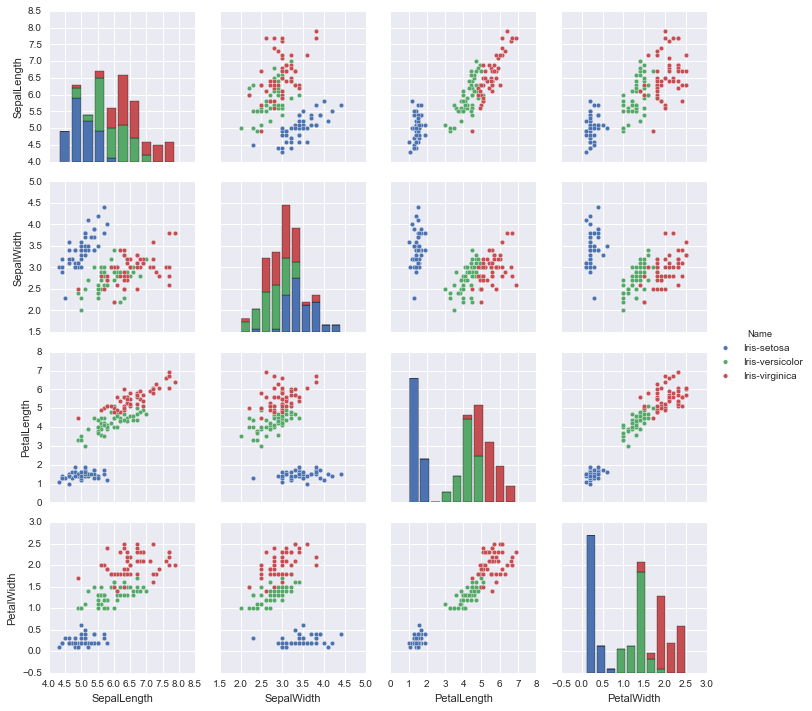

In [4]:
g = sns.pairplot(df, hue="Name")

# The Venture Program

In [5]:
ripl = shortcuts.make_lite_ripl()

Couldn't import dot_parser, loading of dot files will not be possible.


In [6]:
program = """

// a single latent dimension

assume x = mem(proc(i){normal(0,10)});


// Hyper-parameters

assume tolerance_constant = 00000.1;

assume noise_sigma = mem(proc(gp_index){tag("noise", gp_index, gamma(5,1))});

assume scale_factor = mem(proc(gp_index){tag("scale", gp_index, gamma(5,1))});
assume offset = mem(proc(gp_index){tag("off", gp_index, gamma(5,1))});


assume noise_kernel = proc(gp_index){gp_cov_scale(noise_sigma(gp_index),gp_cov_delta(tolerance_constant))};
assume linear_kernel = proc(gp_index){gp_cov_scale(scale_factor(gp_index), gp_cov_linear(offset(gp_index)))};

assume covariance_kernel = proc(gp_index){gp_cov_sum(linear_kernel(gp_index), noise_kernel(gp_index))};

assume zero_mean_function =gp_mean_const(0.);

// independent GPs for each observed dimension
assume gp1 = make_gp(zero_mean_function, covariance_kernel(1));
assume gp2 = make_gp(zero_mean_function, covariance_kernel(2));
assume gp3 = make_gp(zero_mean_function, covariance_kernel(3));
assume gp4 = make_gp(zero_mean_function, covariance_kernel(4));

"""
ripl.execute_program(program);

# Make Observations

In [7]:
for i in range(len(df.index)):
    ripl.execute_program("observe gp1(array(x(%i))) = array(%d)"  % (i,df.iloc[i]["SepalLength"]))
    ripl.execute_program("observe gp2(array(x(%i))) = array(%d)"  % (i,df.iloc[i]["SepalWidth"]))
    ripl.execute_program("observe gp3(array(x(%i))) = array(%d)"  % (i,df.iloc[i]["PetalLength"]))
    ripl.execute_program("observe gp4(array(x(%i))) = array(%d)"  % (i,df.iloc[i]["PetalWidth"]))

Inference does not work

In [8]:
ripl.infer("""mh(default, one, 100)""")

[9.97]

## What we need to get to run 

In [9]:
#ripl.infer("grad_ascent(default, all, 0.05, 100, 1)")

In [10]:
latent_sample = []
for i in range(len(df.index)):
    latent_sample.append(ripl.sample("x(%i)" % (i,)))
latent_sample = np.array(latent_sample)

# Plotting Loading of Latent Component

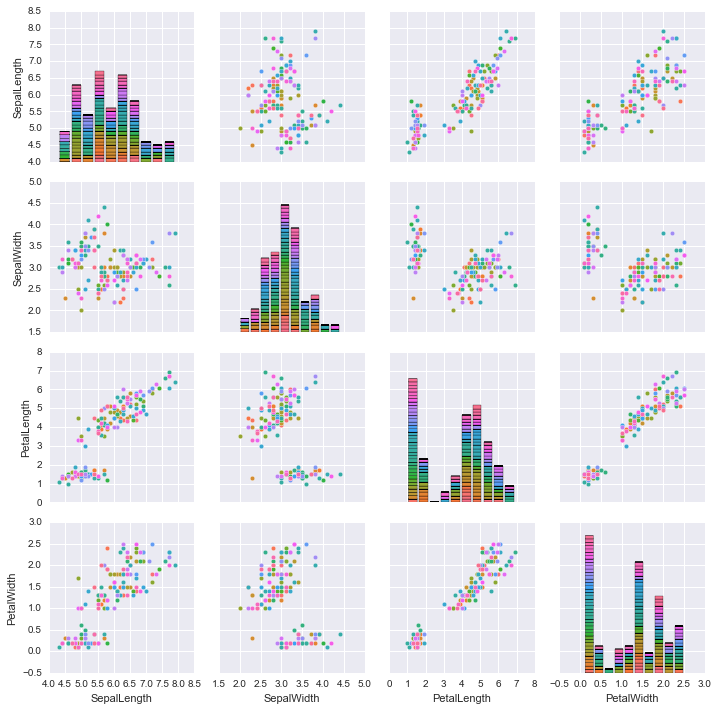

In [11]:
df['GPMem Latent Component'] = pd.Series(latent_sample, index=df.index)
g = sns.pairplot(df,vars=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"],
                 hue="GPMem Latent Component")
g._legend._visible = False

### Scoring on 1 latent component

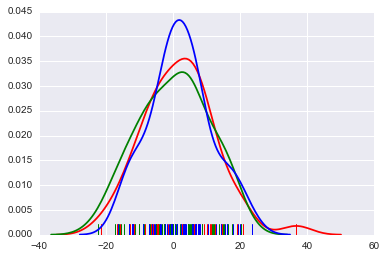

In [12]:
ax = sns.distplot(latent_sample[np.array(df["Name"]=="Iris-virginica")], rug=True, hist=False, color="r")
ax = sns.distplot(latent_sample[np.array(df["Name"]=="Iris-versicolor")], rug=True, hist=False, color="g")
ax = sns.distplot(latent_sample[np.array(df["Name"]=="Iris-setosa")], rug=True, hist=False, color="b")

# PCA with SciKit learn (comparison)

In [13]:
df = pd.read_csv("iris.csv")
pca = PCA(n_components=1)
pca.fit(np.array(df.drop("Name", axis=1))) 
sk_latent = np.dot(np.array(df.drop("Name", axis=1)),pca.components_.T)

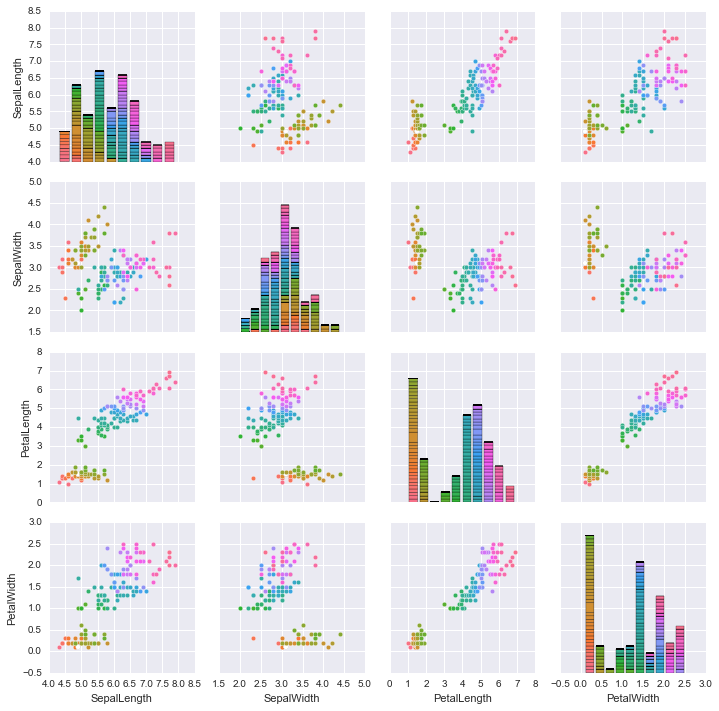

In [14]:
plt.clf
df['SciKit Latent Component'] = pd.Series(sk_latent[:,0], index=df.index)
g = sns.pairplot(df,vars=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"],
                 hue="SciKit Latent Component")
g._legend._visible = False

### Scoring on 1 latent component

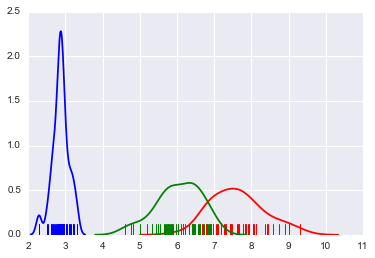

In [15]:
ax = sns.distplot(sk_latent[np.array(df["Name"]=="Iris-virginica")], rug=True, hist=False, color="r")
ax = sns.distplot(sk_latent[np.array(df["Name"]=="Iris-versicolor")], rug=True, hist=False, color="g")
ax = sns.distplot(sk_latent[np.array(df["Name"]=="Iris-setosa")], rug=True, hist=False, color="b")